In [1]:
import itertools
import json
import os
from collections import Counter
from pprint import pprint

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
import pandas as pd
import seaborn as sns

import common

data_paths = ["../output/tireworld"]
data_files = [os.path.join(data_path, f) for data_path in data_paths for f in os.listdir(data_path) if not os.path.isdir(os.path.join(data_path, f))]

plt.style.use('default')

parameters = {
    'axes.labelsize': 20,
    'axes.titlesize': 22,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'legend.fontsize': 18,
    'legend.title_fontsize': 18,
}
plt.rcParams.update(parameters)

In [2]:
data_files = common.get_data_files_from_paths(data_paths)
print(f"Found {len(data_files)} data files")

Found 1856 data files


In [3]:
def read_json(file_name):
    with open(file_name) as json_data:
        return json.load(json_data)        

In [4]:
def read_file_data(file_name):
    heuristics_spl = file_name.split('/')[0].split('_')
    return {
        **read_json(file_name),
        'output_file_name': file_name,
    }

In [5]:
info_runs = [read_file_data(file_name) for file_name in data_files]
len(info_runs)

1856

In [6]:
# get summary of parameters in different runs analyzed
# get summary of parameters in different runs analyzed

problem_runs = common.filter_runs_by_props(info_runs, ("args.problem_index", 2))

params_values = {}
for run in problem_runs:
    for param, val in run['args'].items():
        if param not in params_values:
            params_values[param] = set()
        params_values[param].add(val)

params_values_strings = {param: json.dumps(sorted(list(values))) for param, values in params_values.items()}
df = pd.DataFrame(params_values_strings.values(), index=params_values_strings.keys())
df

,0
env,"[""PDDLEnvTireworld-v0""]"
problem_index,[2]
horizon,[50]
n_rollouts,"[50, 100, 1000]"
n_rounds,[30]
n_sim_steps,[25]
exploration_constant,[1.414]
norm_exploration_constant,"[false, true]"
h_init_count,"[1, 20]"
k_g,"[1e-07, 0.01]"


In [7]:
runs_by_envs = {}
for run in info_runs:
    if 'env' not in run:
        run['env'] = 'PDDLEnvTireworld-v0'
    env = run['env']
    if env not in runs_by_envs:
        runs_by_envs[env] = []
    runs_by_envs[env].append(run)


In [8]:
set([(run['args']['lamb'],run['args']['k_g'])  for run in runs_by_envs['PDDLEnvTireworld-v0'] if run['args']['problem_index'] == 2])

{(-0.3, 1e-07),
 (-0.3, 0.01),
 (-0.25, 1e-07),
 (-0.25, 0.01),
 (-0.2, 1e-07),
 (-0.2, 0.01)}

# Optimal values

In [9]:
# optimal values

optimal_vals = {
    # key: problem index
    2: [
        (-0.3, 1e-7, ("movecar(l-2-1:location)", 0.008201135413049471, 0.5)),
        (-0.25, 1e-7, ("movecar(l-2-1:location)", 0.016069918760444887, 0.5)),
        (-0.2, 1e-7, ("movecar(l-2-1:location)", 0.03190194534809213, 1)),
        #
        (-0.3, 1e-2, ("movecar(l-2-1:location)", 0.01593605031441085, 1)),
        (-0.25, 1e-2, ("movecar(l-2-1:location)", 0.023714722782884381, 1)),
        (-0.2, 1e-2, ("movecar(l-2-1:location)", 0.04190184534809213, 1)),
        #
#         (-0.3, 1, ("movecar(l-2-1:location)", 1.0059360503144108, 1)),
#         (-0.25, 1, ("movecar(l-2-1:location)", 1.0137147227828844, 1)),
#         (-0.2, 1, ("movecar(l-2-1:location)", 1.0319018453480922, 1)),
    ],
}

optimal_actions_by_lamb_tireworld_2_1e7 = common.get_res_by_lamb(0, 1e-7, 2, optimal_vals)
optimal_qs_by_lamb_tireworld_2_1e7 = common.get_res_by_lamb(1, 1e-7, 2, optimal_vals)
optimal_probs_by_lamb_tireworld_2_1e7 = common.get_res_by_lamb(2, 1e-7, 2, optimal_vals)

optimal_actions_by_kg_tireworld_2_03 = common.get_res_by_kg(0, -0.3, 2, optimal_vals)
optimal_qs_by_kg_tireworld_2_03 = common.get_res_by_kg(1, -0.3, 2, optimal_vals)
optimal_probs_by_kg_tireworld_2_03 = common.get_res_by_kg(2, -0.3, 2, optimal_vals)

print(
    optimal_actions_by_lamb_tireworld_2_1e7, '\n',
    optimal_qs_by_lamb_tireworld_2_1e7, '\n',
    optimal_probs_by_lamb_tireworld_2_1e7, '\n',
    optimal_actions_by_kg_tireworld_2_03, '\n',
    optimal_qs_by_kg_tireworld_2_03, '\n',
    optimal_probs_by_kg_tireworld_2_03
)

{-0.3: 'movecar(l-2-1:location)', -0.25: 'movecar(l-2-1:location)', -0.2: 'movecar(l-2-1:location)'} 
 {-0.3: 0.008201135413049471, -0.25: 0.016069918760444887, -0.2: 0.03190194534809213} 
 {-0.3: 0.5, -0.25: 0.5, -0.2: 1} 
 {1e-07: 'movecar(l-2-1:location)', 0.01: 'movecar(l-2-1:location)'} 
 {1e-07: 0.008201135413049471, 0.01: 0.01593605031441085} 
 {1e-07: 0.5, 0.01: 1}


In [10]:
kg_opt_probs = np.array([prob for k_g, prob in optimal_probs_by_lamb_tireworld_2_1e7.items()])
lamb_opt_probs = np.fromiter(optimal_probs_by_kg_tireworld_2_03.values(), dtype=float)
lamb_opt_qs = np.fromiter(optimal_qs_by_kg_tireworld_2_03.values(), dtype=float)
kg_opt_qs = np.fromiter(optimal_qs_by_lamb_tireworld_2_1e7.values(), dtype=float)

print(
    kg_opt_probs,
    lamb_opt_probs,
    lamb_opt_qs,
    kg_opt_qs,
)

[0.5 0.5 1. ] [0.5 1. ] [0.00820114 0.01593605] [0.00820114 0.01606992 0.03190195]


# Evaluate heuristics

In [11]:
# Parâmetros:
#       base_params -> parâmetros fixados
#       parâmetros das linhas -> o que vai ser variado em cada linha plotada no gráfico
#       variável fixa - cada plot representa um valor fixado dessa variável - ex: lambda
#       parâmetro x que varia -> o que vai aparecer no eixo x dos plots - ex: k_g
#       parâmetros de cada conjunto de plots - o eixo y do que vai ser mostrado nos plots.
#         Cada um é um conjunto de plots diferentes

In [12]:
# Evaluate heuristics

base_params = [("args.problem_index", 2), ("args.n_rollouts", 1000), ("args.h_init_count", 20), ("args.norm_exploration_constant", True), ("args.horizon", 50)]

h1_runs = common.filter_runs_by_props(info_runs, ("args.h_p", "h1"), ("args.h_u", "h1"), *base_params)
h1p_runs = common.filter_runs_by_props(info_runs, ("args.h_p", "h1"), ("args.h_u", "shortest_path"), *base_params)
h1u_runs = common.filter_runs_by_props(info_runs, ("args.h_p", "handcrafted"), ("args.h_u", "h1"), *base_params)
h_runs = common.filter_runs_by_props(info_runs, ("args.h_p", "handcrafted"), ("args.h_u", "shortest_path"), *base_params)

# check for intersection - shouldn't have any
# ----------------------------------------------------------------
common.check_for_intersections([
    h1_runs,
    h1p_runs,
    h1u_runs,
    h_runs
])
# ----------------------------------------------------------------

print(len(info_runs), len(h1_runs), len(h1p_runs), len(h1u_runs), len(h_runs))

1856 6 6 6 6


actions: ['movecar(l-1-2:location)', 'movecar(l-2-1:location)']
  sub[2]: [[12, 9], [18, 21]] 2 [0, 0]
  sub[2]: [[12, 6], [18, 24]] 2 [0, 0]
  sub[2]: [[12, 11], [18, 19]] 2 [0, 0]
  sub[2]: [[13, 12], [17, 18]] 2 [0, 0]
lamb
[(array([1.e-07, 1.e-02]),
  ['movecar(l-1-2:location)', 'movecar(l-2-1:location)'],
  [[12, 9], [18, 21]]),
 (array([1.e-07, 1.e-02]),
  ['movecar(l-1-2:location)', 'movecar(l-2-1:location)'],
  [[12, 6], [18, 24]]),
 (array([1.e-07, 1.e-02]),
  ['movecar(l-1-2:location)', 'movecar(l-2-1:location)'],
  [[12, 11], [18, 19]]),
 (array([1.e-07, 1.e-02]),
  ['movecar(l-1-2:location)', 'movecar(l-2-1:location)'],
  [[13, 12], [17, 18]])]
actions: ['movecar(l-1-2:location)', 'movecar(l-2-1:location)']
  sub[2]: [[12, 13, 6], [18, 17, 24]] 2 [0, 0, 0]
  sub[2]: [[12, 9, 10], [18, 21, 20]] 2 [0, 0, 0]
  sub[2]: [[12, 7, 7], [18, 23, 23]] 2 [0, 0, 0]
  sub[2]: [[13, 13, 11], [17, 17, 19]] 2 [0, 0, 0]
lamb
[(array([1.e-07, 1.e-02]),
  ['movecar(l-1-2:location)', 'movecar(

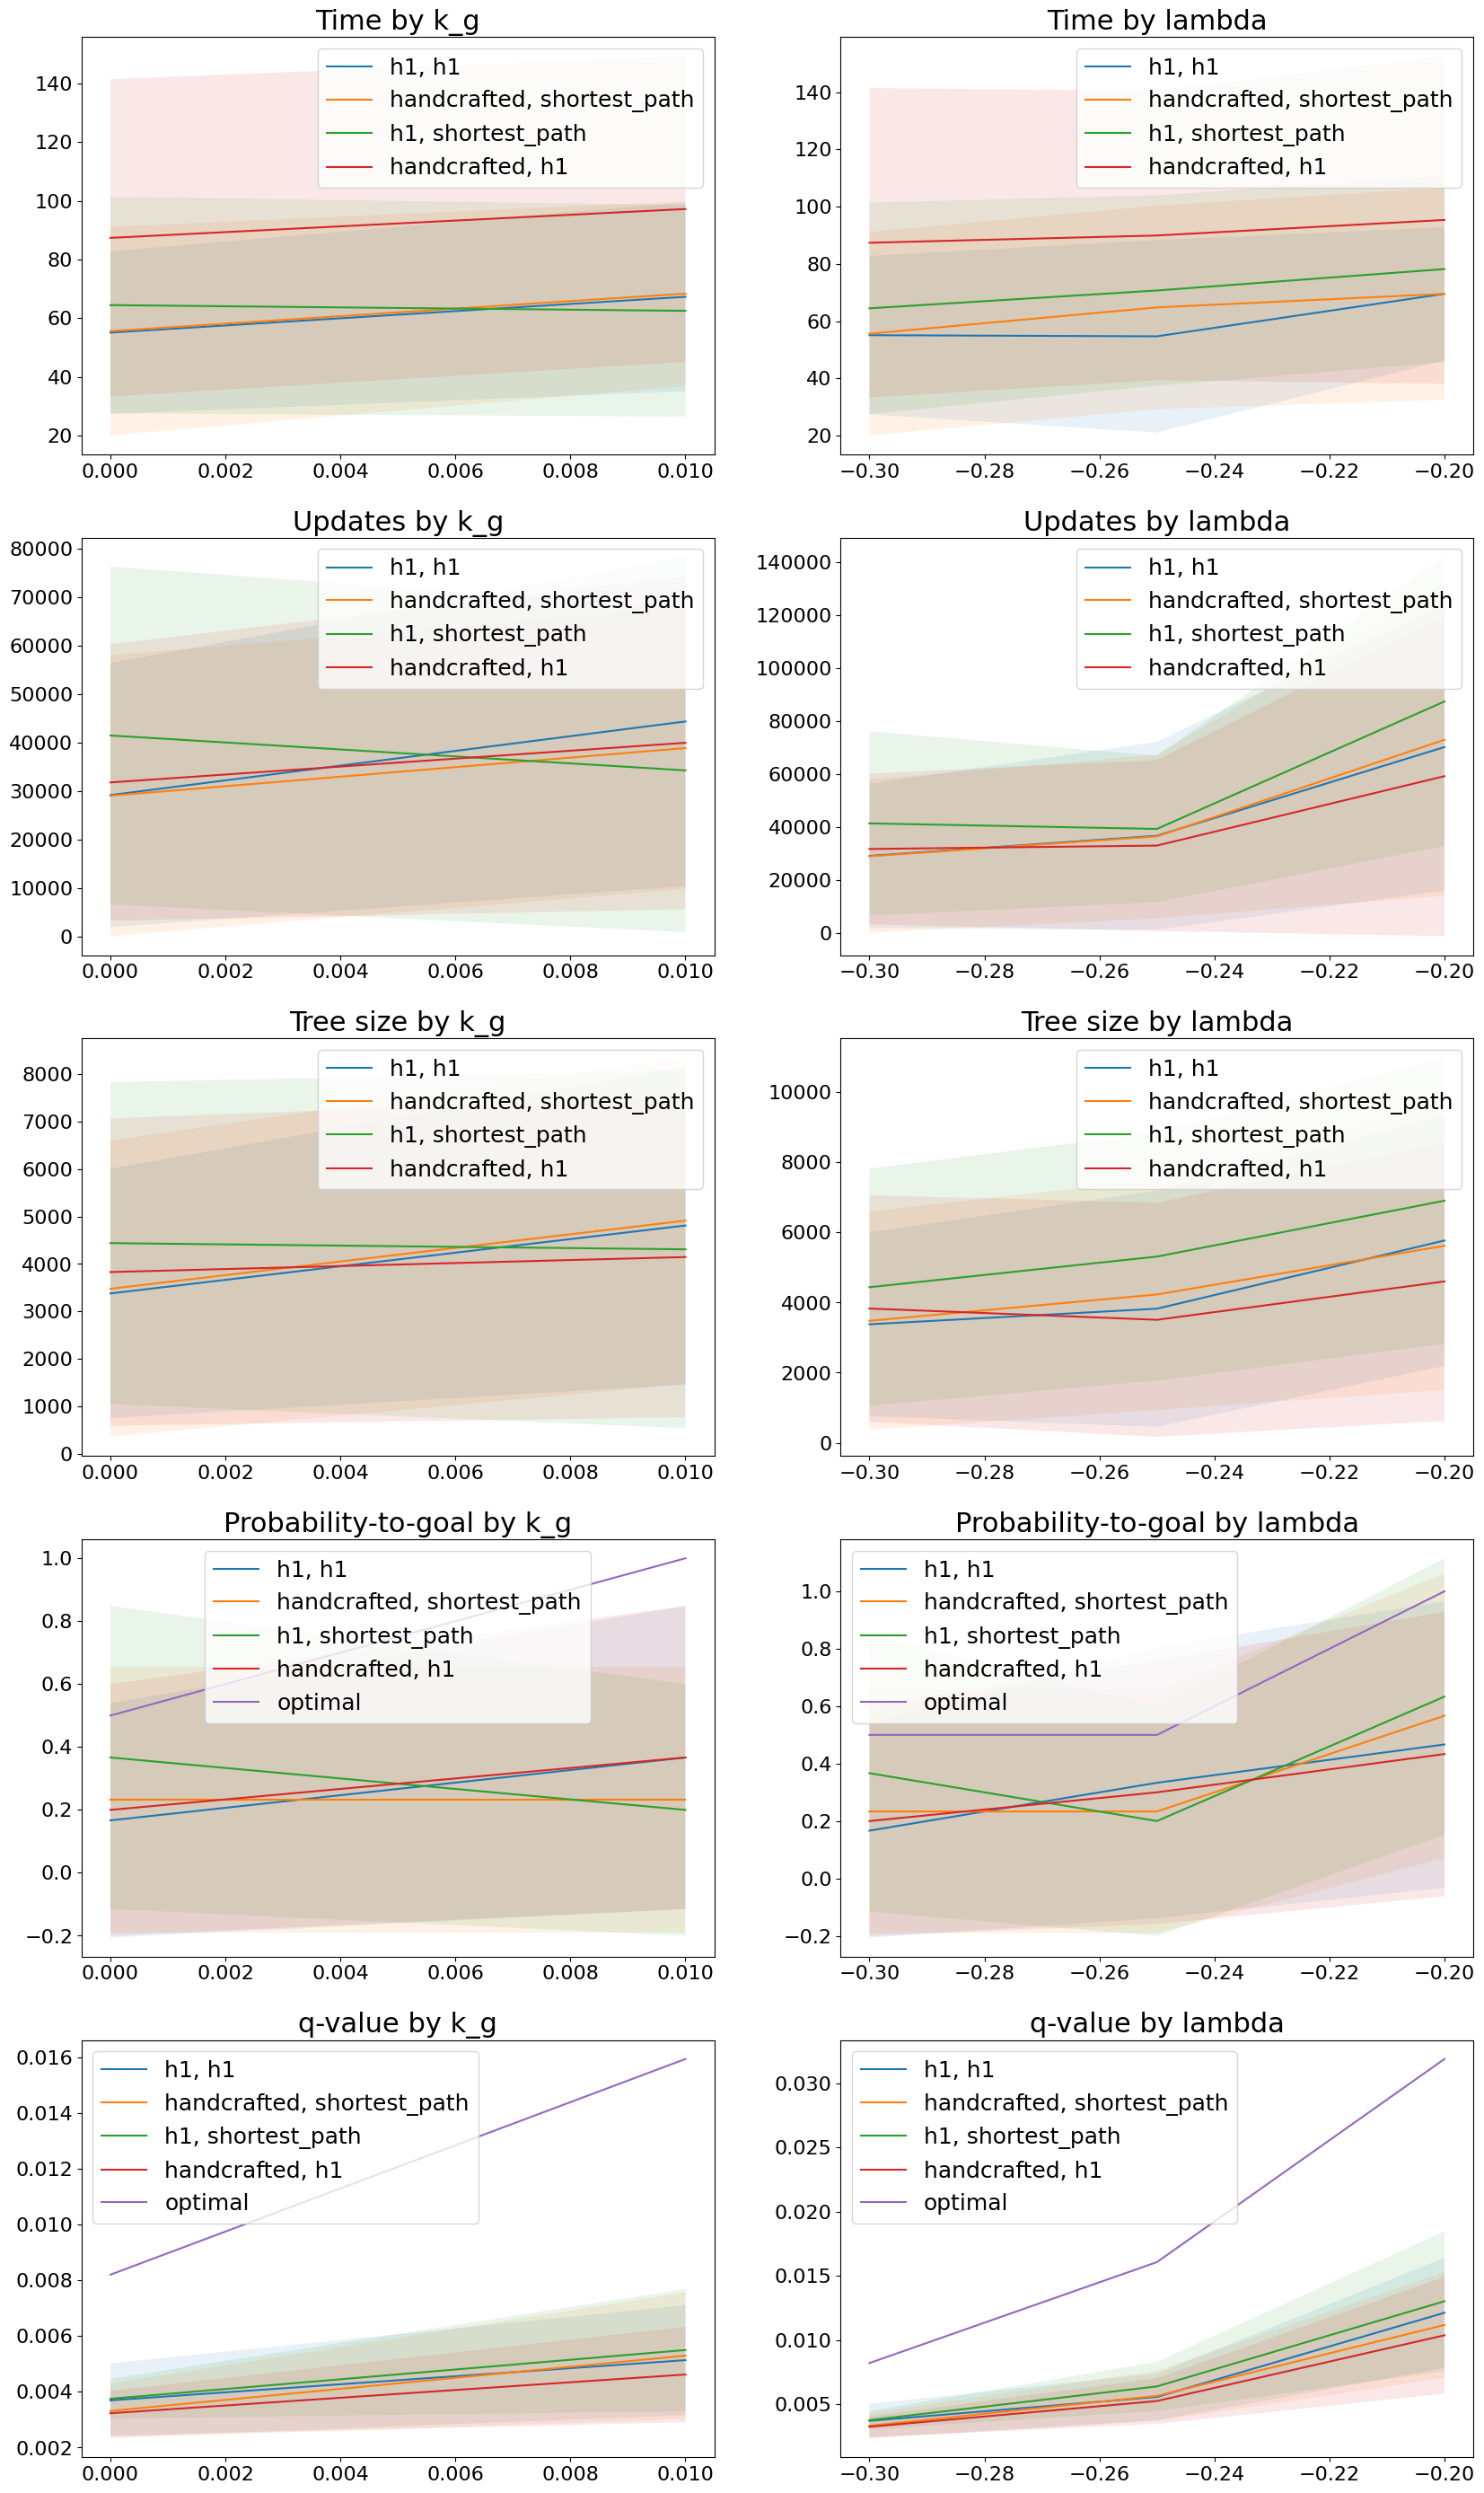

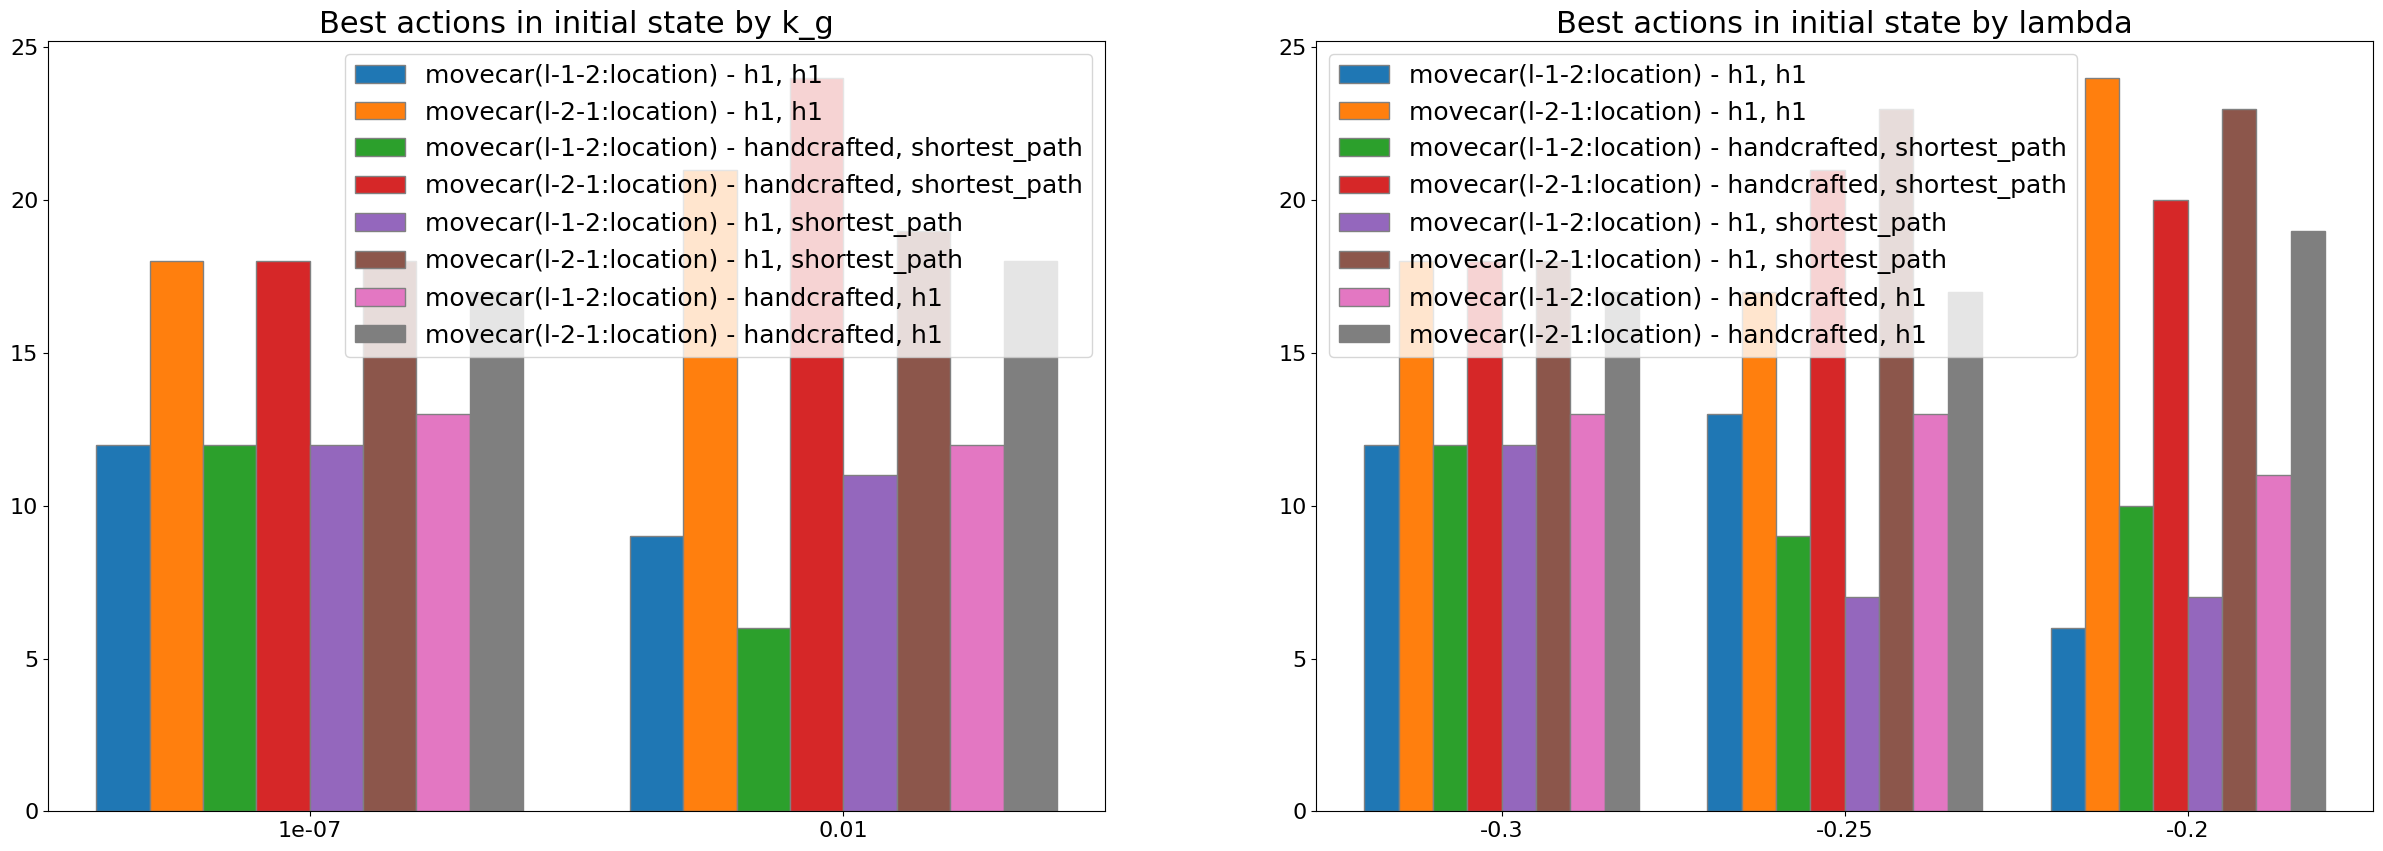

In [13]:
# fix k_g and leave lambda as variable
y_vars = [
    ("cpu_times", "line"),
    ("n_updates", "line"),
    ("tree_sizes", "line"),
    ("found_goal", "line"),
    ("values_s0", "line"),
    ("best_actions_s0", "bar")
]

source_runs = [
    h1_runs,
    h_runs,
    h1p_runs,
    h1u_runs,
]


plot_data_lamb = common.get_plot_data_by_fixed_var_from_sources(
    "args.lamb", -0.3,
    "args.k_g", y_vars,
    source_runs
)

(
    sources_lambda_fixed_time,
    sources_lambda_fixed_n_updates,
    sources_lambda_fixed_size,
    sources_lambda_fixed_prob,
    sources_lambda_fixed_q,
    _sources_lamb_best_actions
) = common.get_plot_source_from_plot_data(plot_data_lamb)
sources_lamb_best_actions = common.parse_best_actions_plot_source(_sources_lamb_best_actions)
print("lamb")
pprint(_sources_lamb_best_actions)

# print("eita by kg")
# pprint(_sources_lamb_best_actions)
# print()
# pprint(sources_lamb_best_actions)
# print("eita fim")

plot_data_kg = common.get_plot_data_by_fixed_var_from_sources(
    "args.k_g", 1e-7,
    "args.lamb", y_vars,
    source_runs
)

(
    sources_kg_fixed_time,
    sources_kg_fixed_n_updates,
    sources_kg_fixed_size,
    sources_kg_fixed_prob,
    sources_kg_fixed_q,
    _sources_kg_best_actions
) = common.get_plot_source_from_plot_data(plot_data_kg)
sources_kg_best_actions = common.parse_best_actions_plot_source(_sources_kg_best_actions)
print("lamb")
pprint(_sources_lamb_best_actions)
print("kg")
pprint(_sources_kg_best_actions)

# print("eita by lamb")
# pprint(_sources_kg_best_actions)
# print()
# pprint(sources_kg_best_actions)
# print("eita fim")

labels = ["h1, h1", "handcrafted, shortest_path", "h1, shortest_path", "handcrafted, h1", "optimal"]

titles = [
    ["Time by k_g", "Time by lambda"],
    ["Updates by k_g", "Updates by lambda"],
    ["Tree size by k_g", "Tree size by lambda"],
    ["Probability-to-goal by k_g", "Probability-to-goal by lambda"],
    ["q-value by k_g", "q-value by lambda"]
]

# print("eita")
# pprint(sources_lambda_fixed_time)
# pprint(sources_kg_fixed_time)
# print("eita fim")

# print("eita2")
# pprint(sources_lambda_fixed_size)
# pprint(sources_kg_fixed_size)
# print("eita2 fim")
pprint([
    [(sources_lambda_fixed_prob[-1][0], kg_opt_probs)],
    [(sources_kg_fixed_prob[-1][0], lamb_opt_probs)],
    [(sources_lambda_fixed_q[-1][0], lamb_opt_qs)],
    [(sources_kg_fixed_q[-1][0], kg_opt_qs)]
])

common.plot_multiple_from_plot_data_source_sets(
    [
        [sources_lambda_fixed_time, sources_kg_fixed_time],
        [sources_lambda_fixed_n_updates, sources_kg_fixed_n_updates],
        [sources_lambda_fixed_size, sources_kg_fixed_size],
        [
            sources_lambda_fixed_prob + [(sources_lambda_fixed_prob[-1][0], lamb_opt_probs)],
            sources_kg_fixed_prob + [(sources_kg_fixed_prob[-1][0], kg_opt_probs)]
        ],
        [
            sources_lambda_fixed_q + [(sources_lambda_fixed_q[-1][0], lamb_opt_qs)],
            sources_kg_fixed_q + [(sources_kg_fixed_q[-1][0], kg_opt_qs)]
        ]
    ],
    titles, labels, (5, 2), (20, 35), plot_type="line"
)


# Plot best actions at s0

labels = [
    'movecar(l-1-2:location) - h1, h1',
    'movecar(l-2-1:location) - h1, h1',
    'movecar(l-1-2:location) - handcrafted, shortest_path',
    'movecar(l-2-1:location) - handcrafted, shortest_path',
    'movecar(l-1-2:location) - h1, shortest_path',
    'movecar(l-2-1:location) - h1, shortest_path',
    'movecar(l-1-2:location) - handcrafted, h1',
    'movecar(l-2-1:location) - handcrafted, h1',
]
titles = [["Best actions in initial state by k_g", "Best actions in initial state by lambda"]]

pprint([sources_lamb_best_actions, sources_kg_best_actions])

common.plot_multiple_from_plot_data_source_sets(
    [[sources_lamb_best_actions, sources_kg_best_actions]],
    titles, [labels, labels], (1, 2), (30, 10), bar_width=0.1, plot_type="bar"
)


# Evaluate normalizing

In [14]:
# Evaluate normalizing

base_params = [
    ("args.problem_index", 2), ("args.n_rollouts", 1000),
    ("args.h_init_count", 20), ("args.horizon", 50),
    ("args.h_u", "shortest_path"), ("args.h_p", "handcrafted")
]

norm_runs = common.filter_runs_by_props(info_runs, ("args.norm_exploration_constant", True), *base_params)
no_norm_runs = common.filter_runs_by_props(info_runs, ("args.norm_exploration_constant", False), *base_params)

# check for intersection - shouldn't have any
# ----------------------------------------------------------------
common.check_for_intersections([
    norm_runs,
    no_norm_runs
])
# ----------------------------------------------------------------

print(len(norm_runs), len(no_norm_runs))

6 6


actions: ['movecar(l-1-2:location)', 'movecar(l-2-1:location)']
  sub[2]: [[12, 6], [18, 24]] 2 [0, 0]
  sub[2]: [[13, 13], [17, 17]] 2 [0, 0]
actions: ['movecar(l-1-2:location)', 'movecar(l-2-1:location)']
  sub[2]: [[12, 9, 10], [18, 21, 20]] 2 [0, 0, 0]
  sub[2]: [[13, 11, 5], [17, 19, 25]] 2 [0, 0, 0]


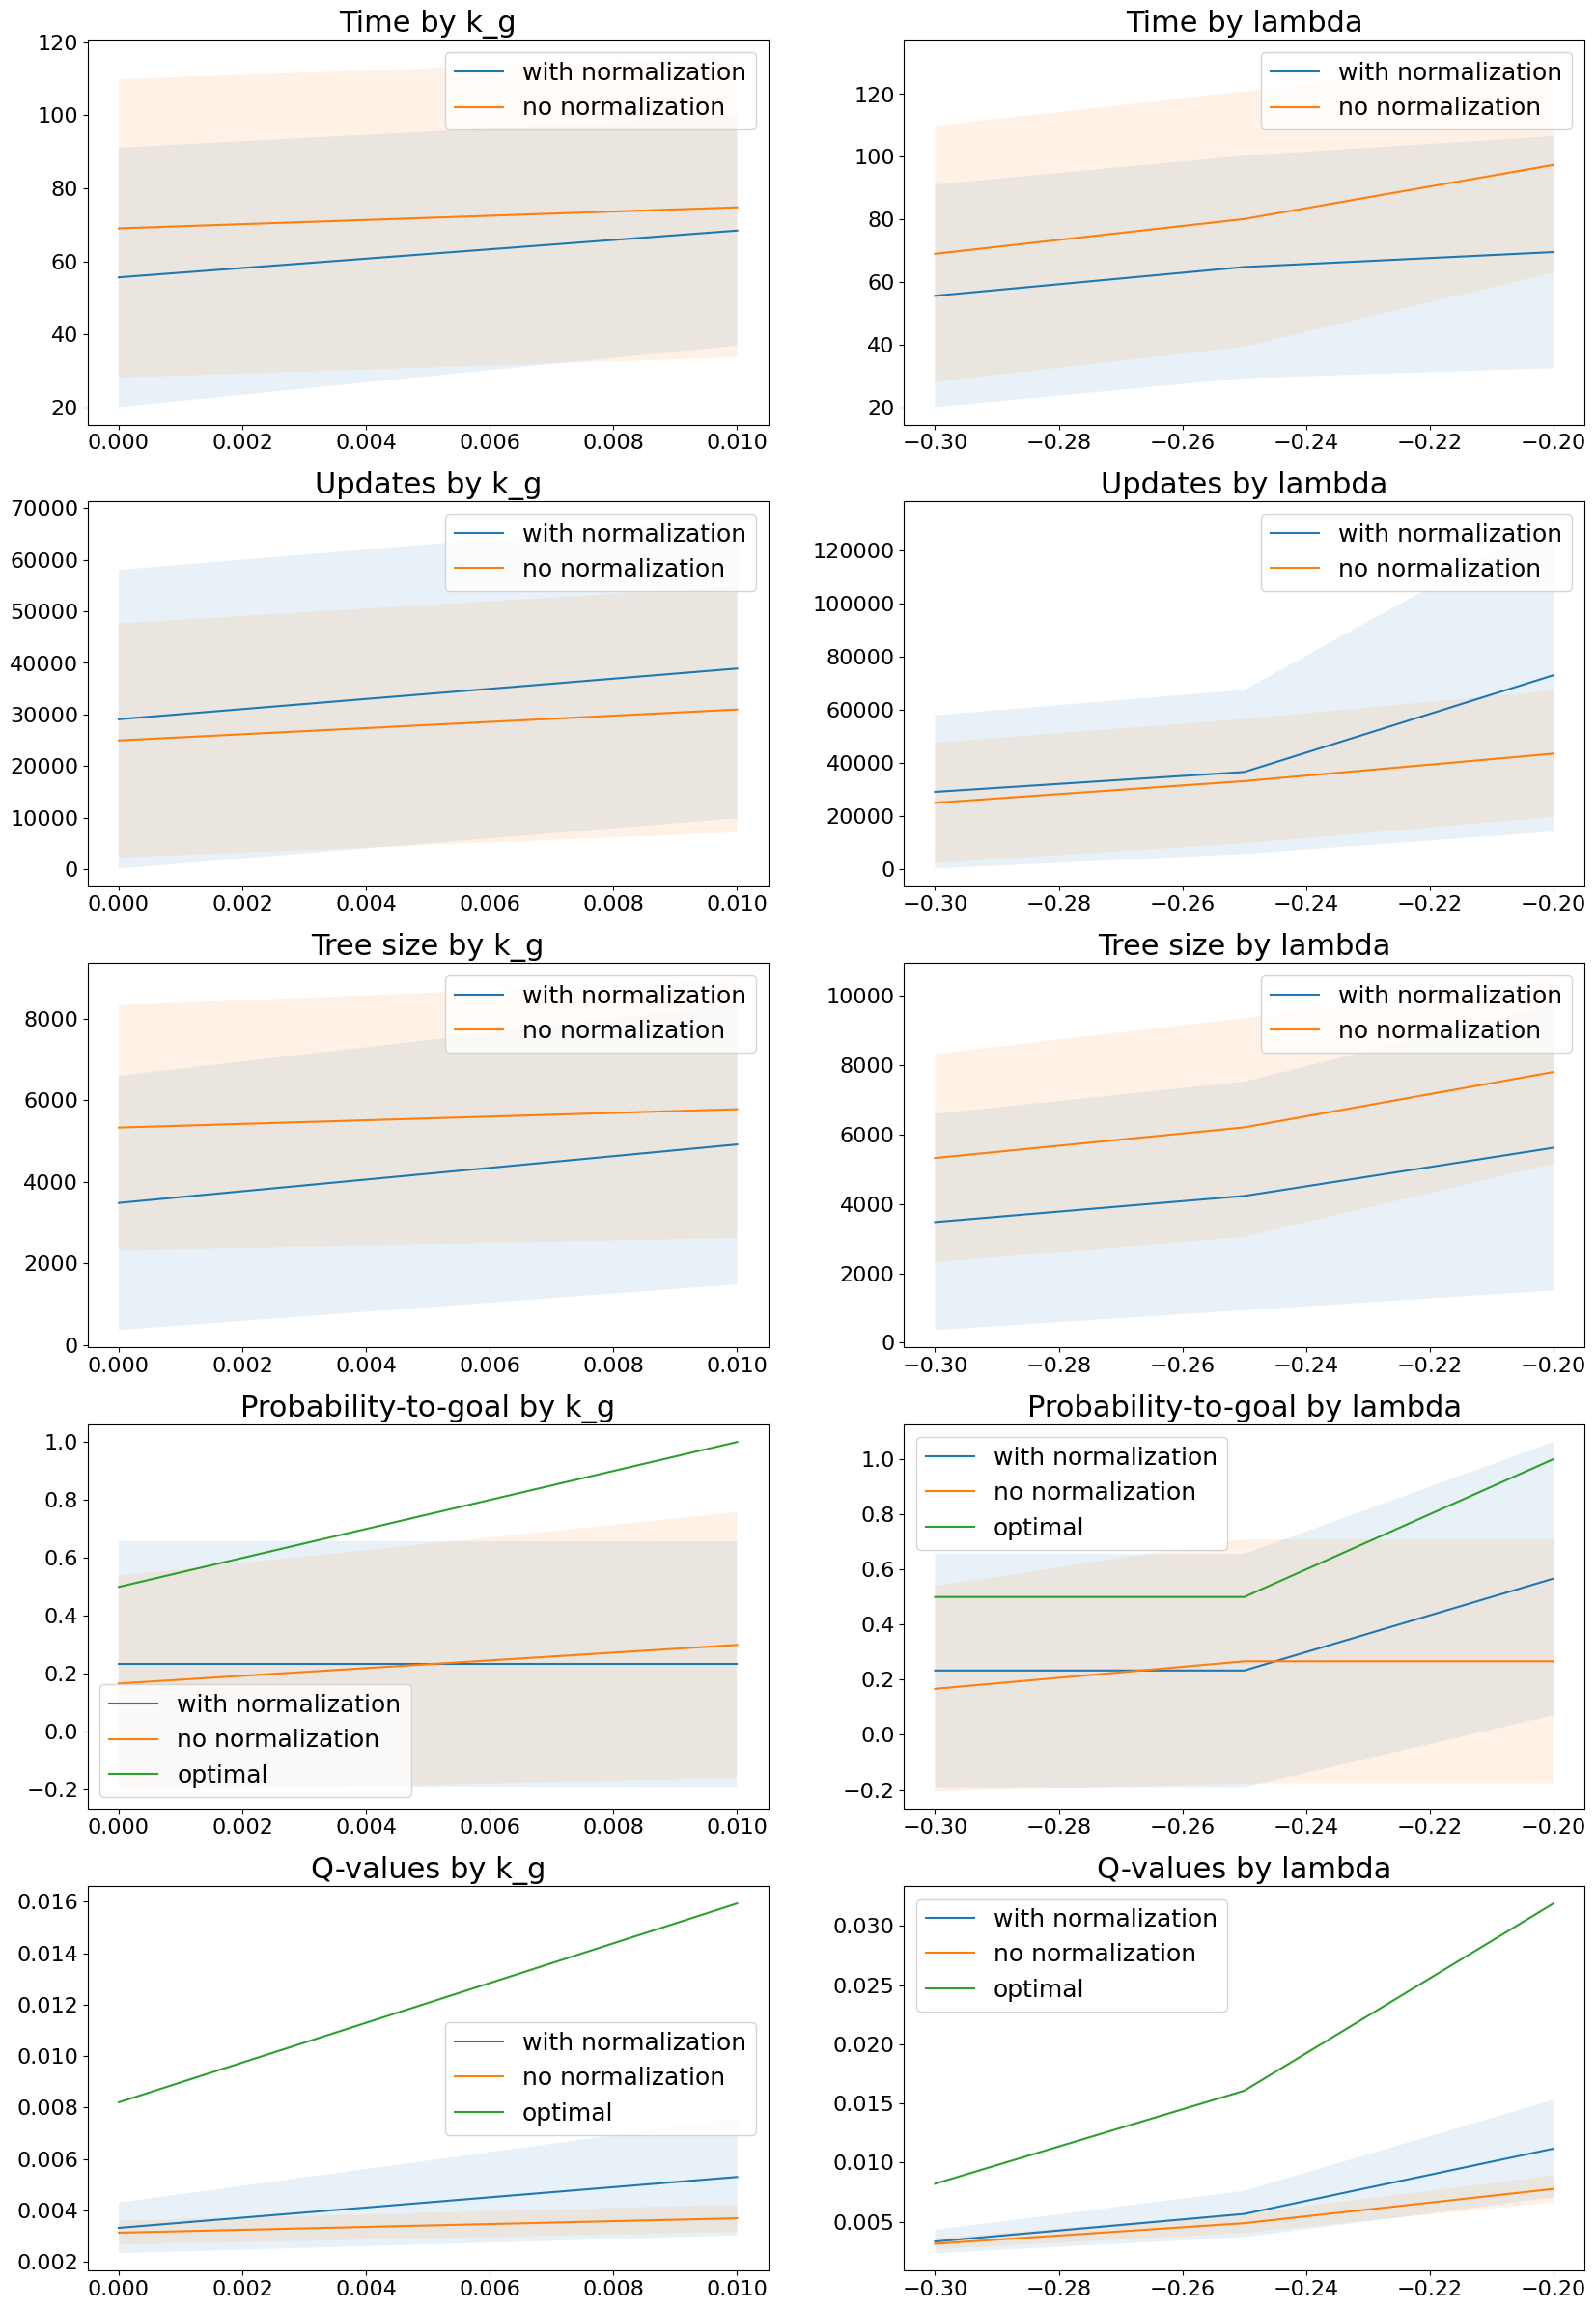

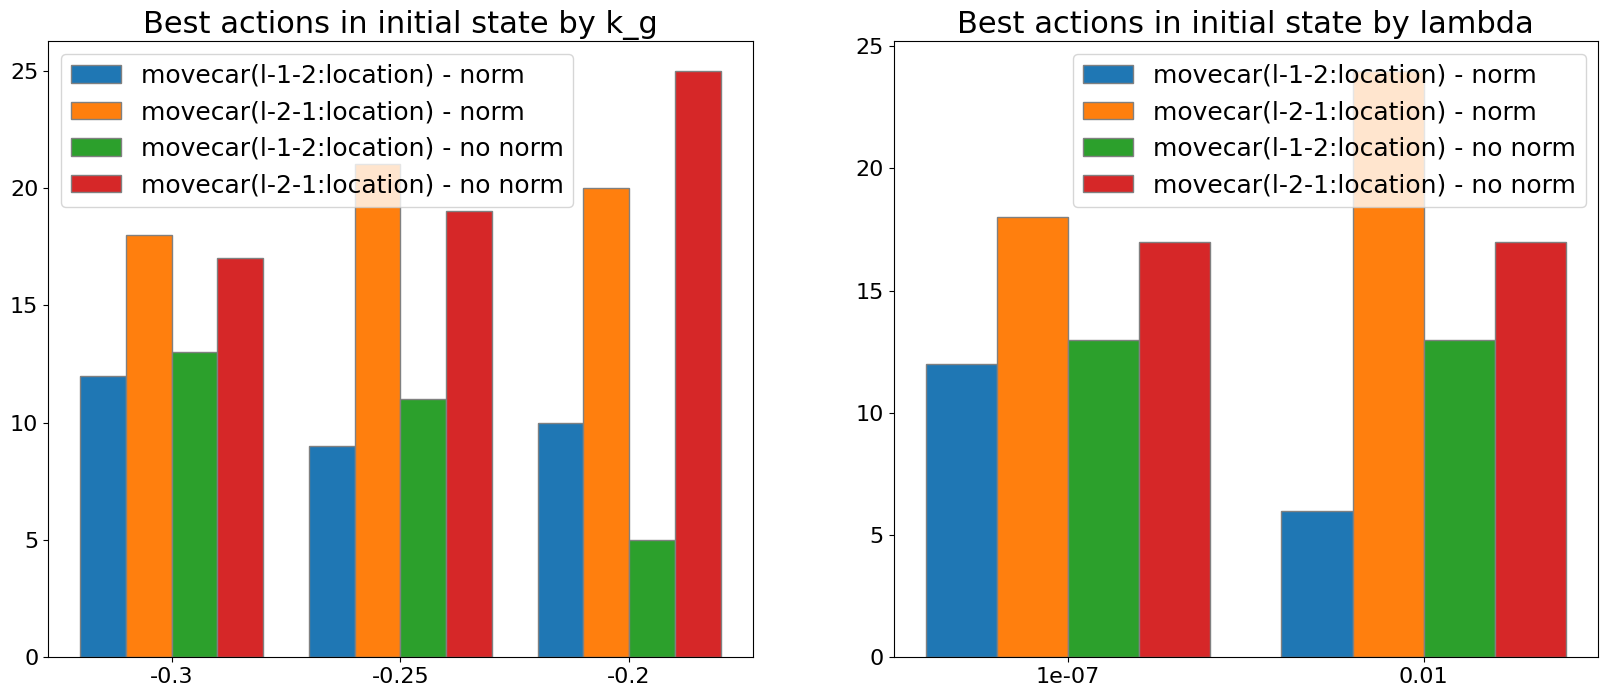

In [15]:
# fix lambda and leave kg as variable

y_vars = [
    ("cpu_times", "line"),
    ("n_updates", "line"),
    ("tree_sizes", "line"),
    ("found_goal", "line"),
    ("values_s0", "line"),
    ("best_actions_s0", "bar")
]
source_runs = [
    norm_runs,
    no_norm_runs
]

plot_datas_by_kg = common.get_plot_data_by_fixed_var_from_sources(
    "args.lamb", -0.3,
    "args.k_g", y_vars,
    source_runs
)

(
    sources_lambda_fixed_time,
    sources_lambda_fixed_n_updates,
    sources_lambda_fixed_size, 
    sources_lambda_fixed_prob, 
    sources_lambda_fixed_qs, 
    _sources_lamb_best_actions) = common.get_plot_source_from_plot_data(plot_datas_by_kg)
sources_lamb_best_actions = common.parse_best_actions_plot_source(_sources_lamb_best_actions)


# fix k_g and leave lambda as variable
plot_datas_by_lamb = common.get_plot_data_by_fixed_var_from_sources(
    "args.k_g", 1e-7,
    "args.lamb", y_vars,
    source_runs
)

(
    sources_kg_fixed_time,
    sources_kg_fixed_n_updates,
    sources_kg_fixed_size,
    sources_kg_fixed_prob,
    sources_kg_fixed_qs,
    _sources_kg_best_actions) = common.get_plot_source_from_plot_data(plot_datas_by_lamb)
sources_kg_best_actions = common.parse_best_actions_plot_source(_sources_kg_best_actions)

labels = ["with normalization", "no normalization", "optimal"]
titles = [
    ["Time by k_g", "Time by lambda"],
    ["Updates by k_g", "Updates by lambda"],
    ["Tree size by k_g", "Tree size by lambda"],
    ["Probability-to-goal by k_g", "Probability-to-goal by lambda"],
    ["Q-values by k_g", "Q-values by lambda"],
]

common.plot_multiple_from_plot_data_source_sets([
    [sources_lambda_fixed_time, sources_kg_fixed_time],
    [sources_lambda_fixed_n_updates, sources_kg_fixed_n_updates],
    [sources_lambda_fixed_size, sources_kg_fixed_size],
    [
        sources_lambda_fixed_prob + [(sources_lambda_fixed_prob[-1][0], lamb_opt_probs)],
        sources_kg_fixed_prob + [(sources_kg_fixed_prob[-1][0], kg_opt_probs)]
    ],
    [
        sources_lambda_fixed_qs + [(sources_lambda_fixed_qs[-1][0], lamb_opt_qs)],
        sources_kg_fixed_qs + [(sources_kg_fixed_qs[-1][0], kg_opt_qs)]
    ]
], titles, labels, (5, 2), (20, 30))


# Plot best actions at s0

labels = [
    'movecar(l-1-2:location) - norm',
    'movecar(l-2-1:location) - norm', 
    'movecar(l-1-2:location) - no norm',
    'movecar(l-2-1:location) - no norm',
]
titles = [["Best actions in initial state by k_g", "Best actions in initial state by lambda"]]


# pprint(sources_kg_best_actions)
common.plot_multiple_from_plot_data_source_sets(
    [[sources_kg_best_actions, sources_lamb_best_actions]],
    titles, [labels, labels], (1, 2), (20, 8), bar_width=0.2, plot_type="bar"
)

# Evaluate number of rollouts

In [16]:
# Evaluate normalizing

base_params = [
    ("args.problem_index", 2), ("args.norm_exploration_constant", True),
    ("args.h_init_count", 20), ("args.horizon", 50),
    ("args.h_u", "shortest_path"), ("args.h_p", "handcrafted")
]

n_rollouts_50_runs   = common.filter_runs_by_props(info_runs, ("args.n_rollouts", 50), *base_params)
n_rollouts_1000_runs = common.filter_runs_by_props(info_runs, ("args.n_rollouts", 1000), *base_params)

# check for intersection - shouldn't have any
# ----------------------------------------------------------------
common.check_for_intersections([
    n_rollouts_50_runs,
    n_rollouts_1000_runs
])
# ----------------------------------------------------------------


print(len(n_rollouts_50_runs), len(n_rollouts_1000_runs))

0 6


In [17]:
# fix lambda and leave kg as variable

# y_vars = [
#     ("cpu_times", "line"),
#     ("tree_sizes", "line"),
#     ("found_goal", "line"),
#     ("values_s0", "line"),
#     ("best_actions_s0", "bar")
# ]

# source_runs = [
#     n_rollouts_50_runs,
#     n_rollouts_1000_runs
# ]

# # fix lambda and leave k_g as variable
# plot_datas_by_kg = common.get_plot_data_by_fixed_var_from_sources(
#     "args.lamb", -0.3,
#     "args.k_g", y_vars,
#     source_runs
# )

# # fix k_g and leave lambda as variable
# plot_datas_by_lamb = common.get_plot_data_by_fixed_var_from_sources(
#     "args.k_g", 1e-7,
#     "args.lamb", y_vars,
#     source_runs
# )

# (sources_lambda_fixed_time,
# sources_lambda_fixed_size, 
# sources_lambda_fixed_prob, 
# sources_lambda_fixed_qs, 
# _sources_lamb_best_actions) = common.get_plot_source_from_plot_data(plot_datas_by_kg)
# sources_lamb_best_actions = common.parse_best_actions_plot_source(_sources_lamb_best_actions)

# (sources_kg_fixed_time,
# sources_kg_fixed_size,
# sources_kg_fixed_prob,
# sources_kg_fixed_qs,
# _sources_kg_best_actions) = common.get_plot_source_from_plot_data(plot_datas_by_lamb)
# sources_kg_best_actions = common.parse_best_actions_plot_source(_sources_kg_best_actions)


# labels = ["50 rollouts", "1000 rollouts", "optimal"]
# titles = [
#     ["Time by k_g", "Time by lambda"],
#     ["Tree size by k_g", "Tree size by lambda"],
#     ["Probability-to-goal by k_g", "Probability-to-goal by lambda"],
#     ["Q-values by k_g", "Q-values by lambda"]
# ]
# common.plot_multiple_from_plot_data_source_sets([
#     [sources_lambda_fixed_time, sources_kg_fixed_time],
#     [sources_lambda_fixed_size, sources_kg_fixed_size],
#     [
#         sources_lambda_fixed_prob,# + [(sources_lambda_fixed_prob[-1][0], kg_opt_probs)],
#         sources_kg_fixed_prob,# + [(sources_kg_fixed_prob[-1][0], lamb_opt_probs)]
#     ],
#     [
#         sources_lambda_fixed_qs,# + [(sources_lambda_fixed_qs[-1][0], kg_opt_qs)],
#         sources_kg_fixed_qs,# + [(sources_kg_fixed_qs[-1][0], lamb_opt_qs)]
#     ]
# ], titles, labels, (4, 2), (20, 25))

# labels = [
#     'movecar(l-1-2:location) - 50 rollouts',
#     'movecar(l-2-1:location) - 50 rollouts',
#     'movecar(l-1-2:location) - 1000 rollouts',
#     'movecar(l-2-1:location) - 1000 rollouts',
# ]

# titles = [["Best actions in initial state by k_g", "Best actions in initial state by lambda"]]

# # pprint(sources_kg_best_actions)
# common.plot_multiple_from_plot_data_source_sets(
#     [[sources_kg_best_actions, sources_lamb_best_actions]],
#     titles, [labels, labels], (1, 2), (20, 8), bar_width=0.1, plot_type="bar"
# )